# <center> Scipy and Matplotlib Assignment

Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Expected Output:
![](imgs/2022-10-20-18-31-03.png)

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Month = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [2]:
def poly(x,a,b,c,d,e):
    return  a*x**4+b*x**3+c*x**2+d*x+e #4th order polimonial eqn

def cycl(x,A,B,C,D):
    return A + B * np.cos(C*x + D) #Periodic Eqn

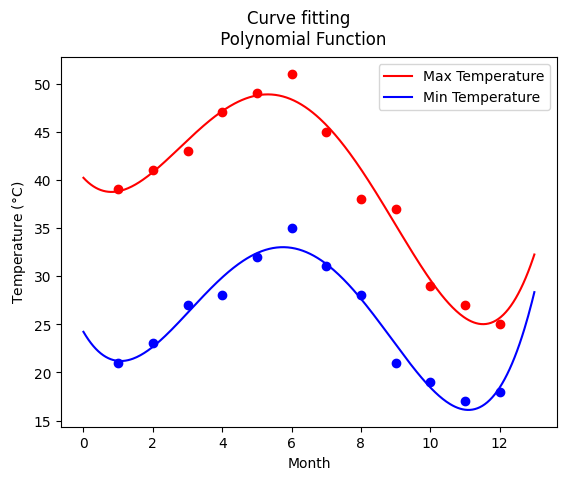

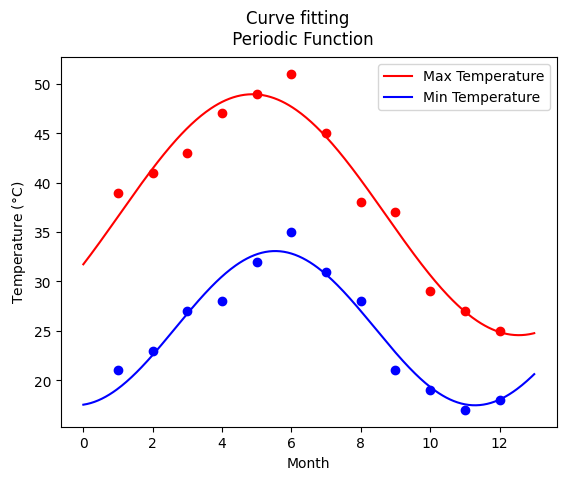

In [3]:
for fn in [poly,cycl]:
    p_x, covarience = curve_fit(fn, Month, Max)
    p_n, covarience = curve_fit(fn, Month, Min)
    days = np.linspace(0,13,365)
    plt.plot(Month,Max,'ro')
    plt.plot(Month,Min,'bo')
    plt.plot(days,fn(days, *p_x),'r-', label='Max Temperature')
    plt.plot(days,fn(days, *p_n),'b-', label='Min Temperature')
    plt.suptitle(f"Curve fitting \n {'Polynomial' if fn==poly else 'Periodic'} Function")
    plt.xlabel('Month')
    plt.ylabel('Temperature ($\degree$C)')
    plt.legend()
    plt.show()

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url, header=0)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


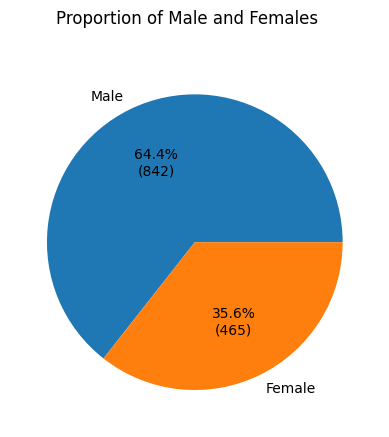

In [6]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(x=titanic['sex'].value_counts(),   labels=['Male','Female'], autopct= lambda pct: func(pct, titanic['sex'].value_counts()))
plt.suptitle('Proportion of Male and Females')
plt.show()

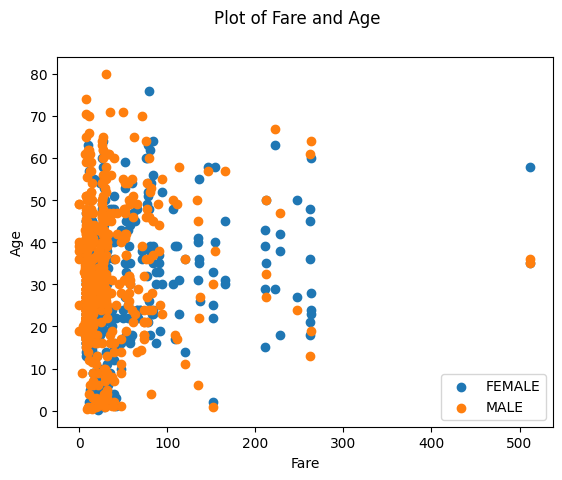

In [8]:
groups = titanic.groupby('sex')
for name, group in groups:
    plt.scatter(group.fare, group.age, marker='o', label=name.upper())
    plt.suptitle('Plot of Fare and Age')
    plt.xlabel('Fare')
    plt.ylabel('Age')
    plt.legend(loc='lower right')